#### Teoría de Circuitos II

# Trabajo semanal 4
#### 

### Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:
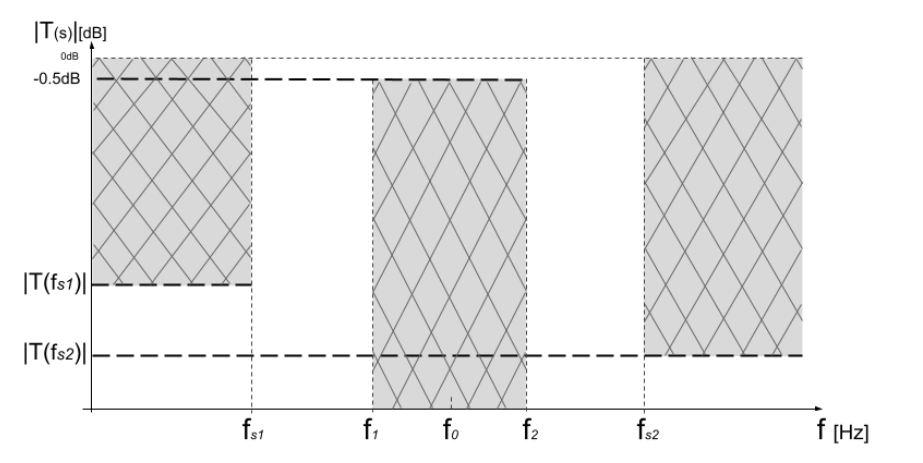

ω0=2π 22 kHz

Q=5

Aproximación Chebyshev con ripple de 0,5 dB

También se sabe que la transferencia del filtro debe ser:

T(Ws1)=-16 dB para Ws1=17 kHz

T(Ws2)=-24 dB para Ws2=36 kHz

#### 👉  Obtener la plantilla de diseño pasabanda normalizada

#### 👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

#### 👉  Obtener la transferencia pasabanda normalizada

#### 👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

#### 👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

Sabiendo que sera por aproximacion de Shebyshev sabemos que el modulo al cuadrado de la transferencia tendra una forma similar a:

\begin{equation}
|T(w)|^2 = \frac{1}{1 + ε^2 * Cn^2(w)}
\end{equation}

Obtengo los datos para hacer el pasabanda:
Bw=Wp1-Wp2
Wo^2=Wp1*Wp2
Q=Wo/Bw

In [2]:
import numpy as np
import math as m
Wo =22*(10**3)
Q=5
Ws1=17*(10**3)
Ws2=36*(10**3)

##Calculo los datos que me faltan
Bw =  Wo / Q 
Wp2_a=np.roots([1,-Bw,-Wo**2])
Wp2=Wp2_a[0]
Wp1=(Wo**2)/Wp2

print(f'Bw = {Bw}')
print(f'Q = {Q}')
print(f'Wp1 = {Wp1}')
print(f'Wp2 = {Wp2}')
print(f'Ws1 = {Ws1}')
print(f'Ws2 = {Ws2}')


Bw = 4400.0
Q = 5
Wp1 = 19909.72636646596
Wp2 = 24309.72636646596
Ws1 = 17000
Ws2 = 36000


Se busca el Epsilon para posteriormente hallar mediante iteracion la N (orden)

In [3]:
Alfa_Max=0.5
Epsilon = m.sqrt(m.pow(10 , 0.1 * Alfa_Max) - 1)
print(f'Epsilon = {Epsilon}')

Epsilon = 0.34931140018894796


Normalizo dividiendo las frecuencias por Wo para simplificar los valores:

\begin{equation}
Ωo= \frac{Wo}{Wo}=1
\end{equation}

\begin{equation}
Ωp1= \frac{Wp1}{Wo}
\end{equation}
\begin{equation}
Ωp2= \frac{Wp2}{Wo}
\end{equation}

\begin{equation}
Ωs1= \frac{Ws1}{Wo}
\end{equation}
\begin{equation}
Ωs2= \frac{Ws2}{Wo}
\end{equation}


In [4]:
Ωo=1
Ωp1_n=Wp1/Wo
Ωp2_n=Wp2/Wo
Ωs1_n=Ws1/Wo
Ωs2_n=Ws2/Wo

print(f'Ωp1_n = {Ωp1_n}')
print(f'Ωp2_n = {Ωp2_n}')
print(f'Ωs1_n = {Ωs1_n}')
print(f'Ωs2_n = {Ωs2_n}')

Ωp1_n = 0.904987562112089
Ωp2_n = 1.104987562112089
Ωs1_n = 0.7727272727272727
Ωs2_n = 1.6363636363636365


Aplico transformada a las frecuencias Ω:

In [5]:
Ωp1=Q*(Ωp1_n**2 -1)/ Ωp1_n
Ωp2=Q*(Ωp2_n**2 -1)/ Ωp2_n
Ωs1=Q*(Ωs1_n**2 -1)/ Ωs1_n
Ωs2=Q*(Ωs2_n**2 -1)/ Ωs2_n

print(f'Ωp1_n = {Ωp1}')
print(f'Ωp2_n = {Ωp2}')
print(f'Ωs1_n = {Ωs1}')
print(f'Ωs2_n = {Ωs2}')

Ωp1_n = -1.0000000000000007
Ωp2_n = 1.0000000000000007
Ωs1_n = -2.606951871657754
Ωs2_n = 5.126262626262627


Se debe elegir el omega que imponga mayor exigencia en el orden ,se analiza las relaciones entre Ws1 , Ws2 y Wo , la relacion mas chica , sera la elegida.

In [6]:
Relacion1=Wo/Ws1
Relacion2=Ws2/Wo
print(f'Relacion1 = {Relacion1}')
print(f'Relacion2 = {Relacion2}')


Relacion1 = 1.2941176470588236
Relacion2 = 1.6363636363636365


Se busca la que presente mayor exigencia (demande un mayor orden N)

In [7]:
Alfa_Min_P1=16
Alfa_Min_P2=24

Alfa_Max=0.5
print(f'Alfa min solicitado con W1 = {Alfa_Min_P1}')
N=2
Alfa_2=m.log10( 1+ (m.pow(10 , 0.1 * Alfa_Max) - 1) *m.cosh((N*m.acosh(Ws1)))* m.cosh((N*m.acosh(Ws1))))
N=3
Alfa_3=m.log10( 1+ (m.pow(10 , 0.1 * Alfa_Max) - 1) *m.cosh((N*m.acosh(Ws1)))* m.cosh((N*m.acosh(Ws1))))

print(f'Alfa obtentido con Ws1 y N=2 = {Alfa_2}')
print(f'Alfa obtentido con Ws1 y N=3 = {Alfa_3}')


print(f'Alfa min solicitado con W2 = {Alfa_Min_P2}')
N=2
Alfa_2=m.log10( 1+ (m.pow(10 , 0.1 * Alfa_Max) - 1) *m.cosh((N*m.acosh(Ws2)))* m.cosh((N*m.acosh(Ws2))))
N=3
Alfa_3=m.log10( 1+ (m.pow(10 , 0.1 * Alfa_Max) - 1) *m.cosh((N*m.acosh(Ws2)))* m.cosh((N*m.acosh(Ws2))))

print(f'Alfa obtentido con Ws2 y N=2 = {Alfa_2}')
print(f'Alfa obtentido con Ws2 y N=3 = {Alfa_3}')

Alfa min solicitado con W1 = 16
Alfa obtentido con Ws1 y N=2 = 16.610281194500008
Alfa obtentido con Ws1 y N=3 = 25.673239027833144
Alfa min solicitado con W2 = 24
Alfa obtentido con Ws2 y N=2 = 17.913695513223704
Alfa obtentido con Ws2 y N=3 = 27.628360505918685


Se obsterva que la W2 presenta mayor exigencia que la W1, por lo que utilizaremos el orden N=3

Sabiendo que por tabla de Shebyshev: 

\begin{equation}
C(n=3) = 4W^3 - 3W
\end{equation}

\begin{equation}
(C(n=3))^2 = 16W^6 - 24W^4 + 9W^2
\end{equation}

Remplazo en la primera ecuacion y se obtiene:
\begin{equation}
|T(w)|^2 = \frac{1}{1 + ε^2(16W^6 - 24W^4 + 9W^2)}
\end{equation}

Para hallar las raices y luego podes aplicar el nucleo de transformada paso del dominio W a el S

\begin{equation}
|T(S)|^2 = \frac{1}{1 + ε^2(-16S^6 - 24S^4 - 9S^2)}=T(S)*T(-S)
\end{equation}

Como el denominador es de orden alto busco las raices mediante roots:

In [8]:
import numpy as np
Eps2=m.pow(10 , 0.1 * Alfa_Max)
Raices=np.roots([ -16*Eps2,0,-24*Eps2,0,-9*Eps2,0,1])
Raices_limpias=Raices[np.real(Raices)<0]

print(f'Raices de T(S) y T(-S) = {Raices}')

print(f'Raices solamente de T(S) = {Raices_limpias}') 

print('Viendo los resultados se persive que de los 3 polos encontrados, 2 son polos conjugados')

Raices de T(S) y T(-S) = [-0.14205489+0.90029927j -0.14205489-0.90029927j  0.14205489+0.90029927j
  0.14205489-0.90029927j -0.28410979+0.j          0.28410979+0.j        ]
Raices solamente de T(S) = [-0.14205489+0.90029927j -0.14205489-0.90029927j -0.28410979+0.j        ]
Viendo los resultados se persive que de los 3 polos encontrados, 2 son polos conjugados


Una vez halladas las reices se ordena de forma tal que:

\begin{equation}
T(S) = \frac{1}{(S-P1)(S-P1')}*  \frac{1}{(S-P2)}
\end{equation}

\begin{equation}
T(S) = \frac{1}{(S-P1)^2}*  \frac{1}{(S-P2)}
\end{equation}

Hallo la Funcion T(s) low pass

\begin{equation}
T(S) = \frac{1}{(S^2 -2(P1*S)+ P1^2}*  \frac{1}{(S-P2)}
\end{equation}

Finalmente aplico el nucleo de la transformadaS=(QS^2 + Q)/S

\begin{equation}
T(S) = \frac{1}{((QS^2 + Q)/S)^2 -2(P1*(QS^2 + Q)/S)+ P1^2}*  \frac{1}{(((QS^2 + Q)/S)-P2)}
\end{equation}

Resuelvo :
\begin{equation}
T(S) = \frac{S^2}{S^4(Q^2) - S^3 2*Real(P1)*Q + S^2(2*Q^2 + P1^2) - S(2*Real(P1)*Q) + Q^2} * \frac{S}{S^2Q -S*P2 + Q}
\end{equation}

Se lo ordena de forma que se pueda identificar los K ,Q y Wo
\begin{equation}
T(S) = \frac{(1/(Q^2)) S^2}{S^4 - S^3 2*Real(P1)*Q/(Q^2) + S^2(2*Q^2 + P1^2)/(Q^2) - S(2*Real(P1)*Q)/(Q^2) + 1} * \frac{(1/Q)S}{S^2 -S*(P2/Q) + 1}
\end{equation}

Remplazo los Q y P para obtener la Funcion Transferencia que cumpla los requisitos del pasabanda solicitado:
\begin{equation}
T(S) = \frac{S^3}{S^6 + S^5 0.5682 + S^4 3.911 + S^3 1.372 + S^2 3.911 + S 0.5682 + 1}
\end{equation}

Paso el primer termino de 2 ordenes a dos terminos de 1 orden , para eso obtengo los polos del primer termino y resuelvo

In [9]:
Raices_Simp=np.roots([ 1,0.5682,3.911,1.372,3.911,0.5682,1])
Raices_Simp
P1=-0.10034405+1.54469159j
P3=-0.1418786 +0.98988407j
P5=-0.04187735+0.64465804j

P2=-0.10034405-1.54469159j
P4=-0.1418786 -0.98988407j
P6=-0.04187735-0.64465804j

P1r=-0.10034405
P3r=-0.1418786
P5r=-0.04187735

Obtengo 3 polos conjugados Dando :

\begin{equation}
T(S) = \frac{S}{(S^2 -2(Real(P1)*S)+ P1^2} * \frac{S}{(S^2 -2(Real(P2)*S)+ P2^2} * \frac{S}{(S^2 -2(Real(P3)*S)+ P3^2} 
\end{equation}

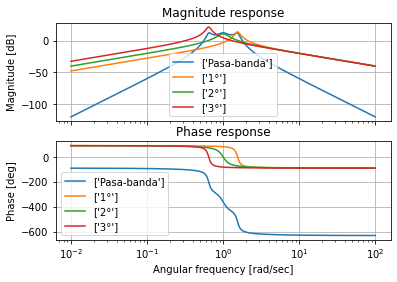

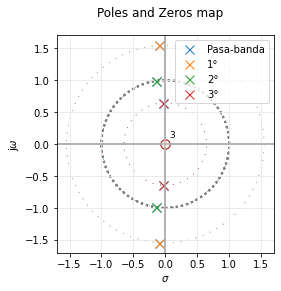

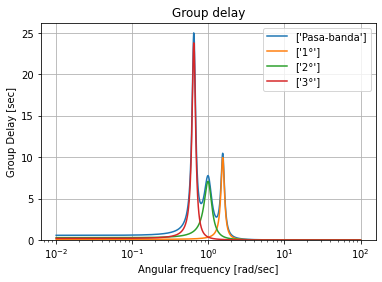

In [10]:
import scipy
import scipy.signal as signal
from scipy import signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq

import splane as siga

num_Pb=[1,0,0,0]
den_Pb=[1,0.5682,3.911,1.372,3.911,0.5682,1]

mi_sos = sig.TransferFunction(num_Pb,den_Pb)
analyze_sys(mi_sos, 'Pasa-banda')

#Por separado seria
num1=[1,0]
den1=[1,-2*P1r,P1*P2]

num2=[1,0]
den2=[1,-2*P3r,P3*P4]

num3=[1,0]
den3=[1,-2*P5r,P5*P6]

mi_sos = sig.TransferFunction(num1,den1)
analyze_sys(mi_sos, '1°')
mi_sos = sig.TransferFunction(num2,den2)
analyze_sys(mi_sos, '2°')
mi_sos = sig.TransferFunction(num3,den3)
analyze_sys(mi_sos, '3°')

Se pide las funciones objetnidas normalizadas:

\begin{equation}
T(S) = \frac{S}{S^2 + S(Wo1/Q1) + Wo1^2 } * \frac{S}{S^2 + S(Wo2/Q2) + Wo2^2 } * \frac{S}{S^2 +S(Wo3/Q3) + Wo3^2}
\end{equation}

Siendo :
Wo1^2= -0.10034405+1.54469159j

Wo2^2= -0.1418786 +0.98988407j

Wo3^2= -0.04187735+0.64465804j

Osea que : 

Wo1= 2.3961

Wo2= 1.000000009177725

Wo3= 0.4173

A = Wo1/Q1 = -2*Real(P1) = 0.2006 

B = Wo2/Q2 = -2*Real(P2) = 0.2837

C = Wo3/Q3 = -2*Real(P3) = 0.08375

Normalizo cada una :
A = 0.2006/Wo1 = 0.0837

B = 0.2837/Wo2 = 0.2836

C = 0.0837/Wo3 = 0.2005


T(s) Pasa-Banda normalizada:

\begin{equation}
T(S) = \frac{S}{S^2 + S(0.0837) + 1 } * \frac{S}{S^2 + S(0.2836) + 1 } * \frac{S}{S^2 +S(0.2005) + 1}
\end{equation}


In [69]:
Q1_n = 1/0.0837

Q2_n= 1/0.2836

Q3_n= 1/0.2005

Corroboracion:

<IPython.core.display.Math object>

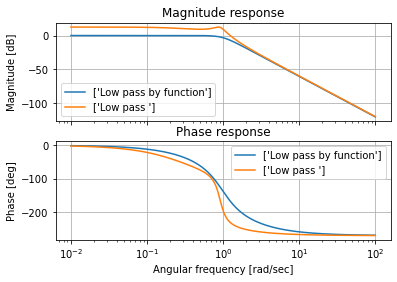

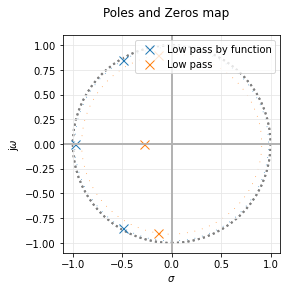

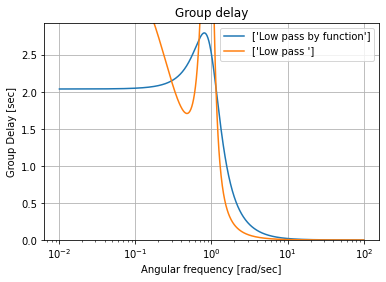

In [70]:
# verificación MP
nn=3
z,p,k = sig.buttap(nn)
num, den = siga.zpk2tf(z,p,k)

# Cualquier camino es válido, pero ojo con el signo de \omega_butter
num_mp_lp, den_mp_lp = sig.lp2lp(num, den, Eps2**(-1/2/nn))

mi_sos_func = sig.TransferFunction(num_mp_lp,den_mp_lp)
analyze_sys(mi_sos_func, 'Low pass by function')

# la visualizamos de algunas formas, la tradicional
siga.pretty_print_lti(mi_sos_func)




num_my=[1]
den_my=[1,0.5682,0.9114, 0.2360]

mi_sos = sig.TransferFunction(num_my,den_my)
analyze_sys(mi_sos, 'Low pass ')


<IPython.core.display.Math object>

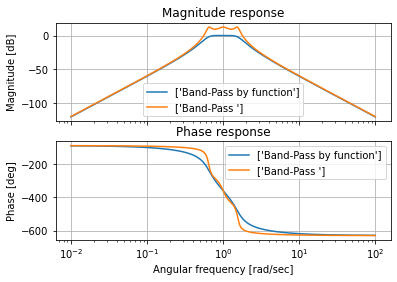

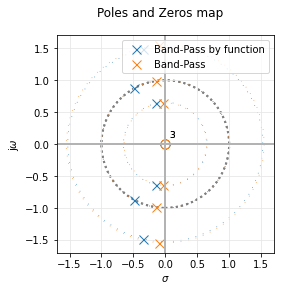

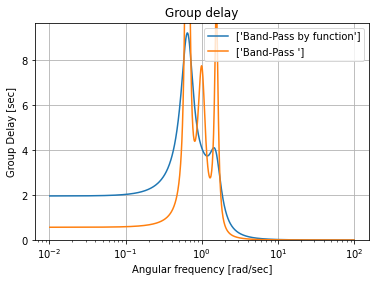

In [71]:
#Aplico transformada 

# obtenemos la transferencia completa pasa-altos
#num_mp_pa, den_mp_pa = sig.lp2hp(num_mp_lp, den_mp_lp)

num_mp_bp, den_mp_bp = sig.lp2bp(num_mp_lp, den_mp_lp)
mi_sos_bp_func = sig.TransferFunction(num_mp_bp,den_mp_bp)
analyze_sys(mi_sos_bp_func, 'Band-Pass by function')

#comparo con lo que obtuve yo
num_my_bp, den_my_bp = sig.lp2bp(num_my, den_my)
mi_sos_bp = sig.TransferFunction(num_my_bp,den_my_bp)
analyze_sys(mi_sos_bp, 'Band-Pass ')

siga.pretty_print_lti(mi_sos_bp)

#mi_sos = sig.TransferFunction(num_mp_pa,den_mp_pa)
#analyze_sys(mi_sos, 'Pasa-altos')


Implementacion:

C=1/(Q*Wo)

L= Q/Wo

R=1

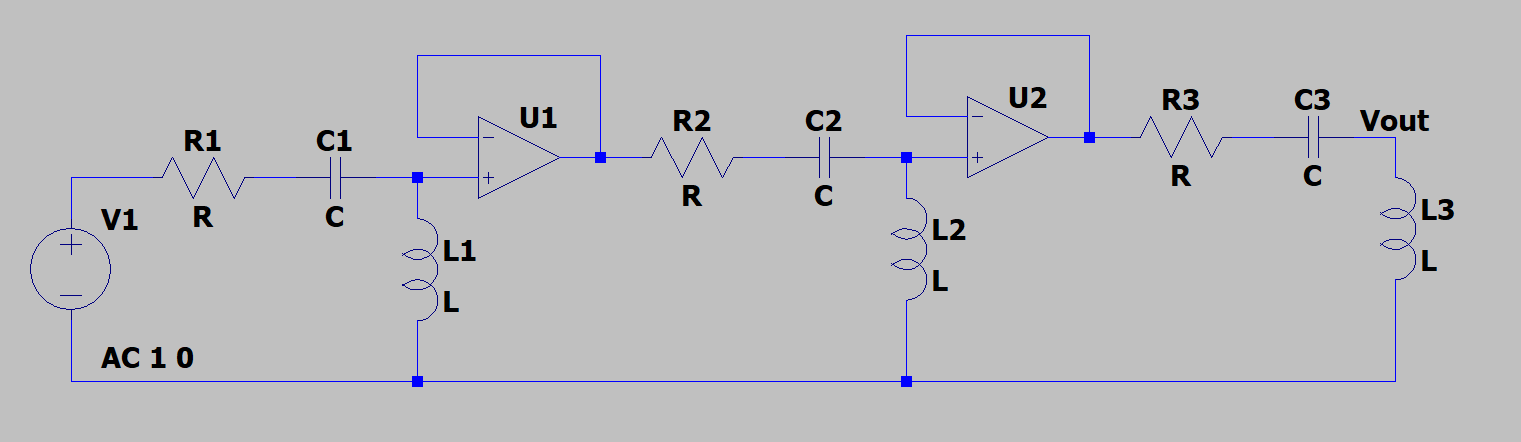

Obtengo los valores normalizados de los componentes:

In [82]:
Wo1=(P1*P2)**(0.5)
Q1= Wo1/(-2*P1r)

Wo2=(P3*P4)**(0.5)
Q2= Wo2/(-2*P3r)

Wo3=(P5*P6)**(0.5)
Q3= Wo3/(-2*P5r)


L1= Q1/Wo1
C1=1/(L1*((Wo1)**2))
R1=1

L2= Q2/Wo2
C2=1/(L2*((Wo2)**2))
R2=1

L3= Q3/Wo3
C3=1/(L3*((Wo3)**2))
R3=1

print(f'C1 = {C1}')
print(f'C2 = {C2}')
print(f'C3 = {C3}')

print(f'L1 = {L1}')
print(f'L2 = {L2}')
print(f'L3 = {L3}')

C1 = (0.08375471098556196+0j)
C2 = (0.28375719739575456+0j)
C3 = (0.2006880753964789+0j)
L1 = (4.982856482272741+0j)
L2 = (3.5241396517868093+0j)
L3 = (11.9396284626415+0j)
